In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set()

In [188]:
df = pd.read_csv('/Users/tanaydangaich/Documents/Courses/Data Viz/HW2/Summer-Olympic-medals-1976-to-2008.csv', 
                 encoding='latin-1')

In [189]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [190]:
df.describe() 

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15316 entries, 0 to 15315
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  int64 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


# What is the distribution of Gold Medals over Age?

We can see a gradual decline in the number of Gold Medals won as athletes grow older, this may also be because of the decrease in the number of athletes as they grow older.

In [192]:
#Create player age table
today = datetime.date.today()
year = today.year
df['Age'] = year - df.Year
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Age
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,47
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,47
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,47
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,47
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,47


In [193]:
goldMedals = df[(df.Medal == 'Gold')]
goldMedals.reset_index()
goldMedals.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Age
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,47
6,Montreal,1976,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold,47
8,Montreal,1976,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,ITA,Italy,M,Gold,47
11,Montreal,1976,Aquatics,Diving,3m springboard,"CHANDLER, Jennifer Kay",Women,USA,United States,W,Gold,47
12,Montreal,1976,Aquatics,Swimming,4x100m freestyle relay,"BABASHOFF, Shirley Farber",Women,USA,United States,W,Gold,47


/Users/tanaydangaich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



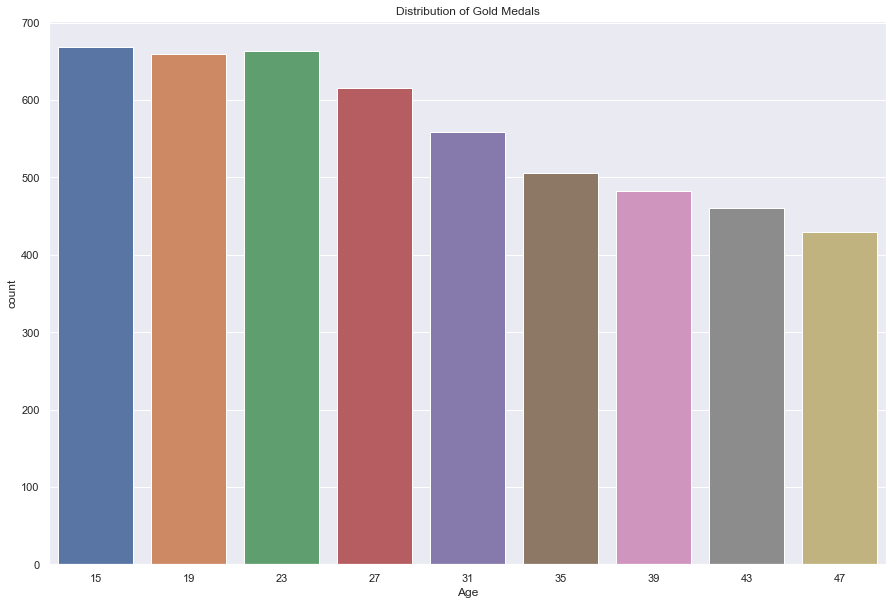

In [194]:
plt.figure(figsize=(15, 10))
plt.title('Distribution of Gold Medals')
sns.countplot(goldMedals['Age'])
plt.show()

In [195]:
masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 40]
masterDisciplines

2        Aquatics
6        Aquatics
8        Aquatics
11       Aquatics
12       Aquatics
          ...    
2685    Wrestling
2686    Wrestling
2687    Wrestling
2690    Wrestling
2691    Wrestling
Name: Sport, Length: 889, dtype: object

# What is the distribution of Gold Medals for Athletes Over 40?
Athletics, Aquatics and Bowling has the highest number of gold medals earned by athletes over 40 compared to other sports. 
Athletics and aquatics require high physical training, so this observation is counter intuitive to me. I would think that archery would be better suited for athletes over 40.

On the other hand, Archery has the lowest count of gold medals for athletes over 40, this might be because of depletion of attention span has humans grow older.

/Users/tanaydangaich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



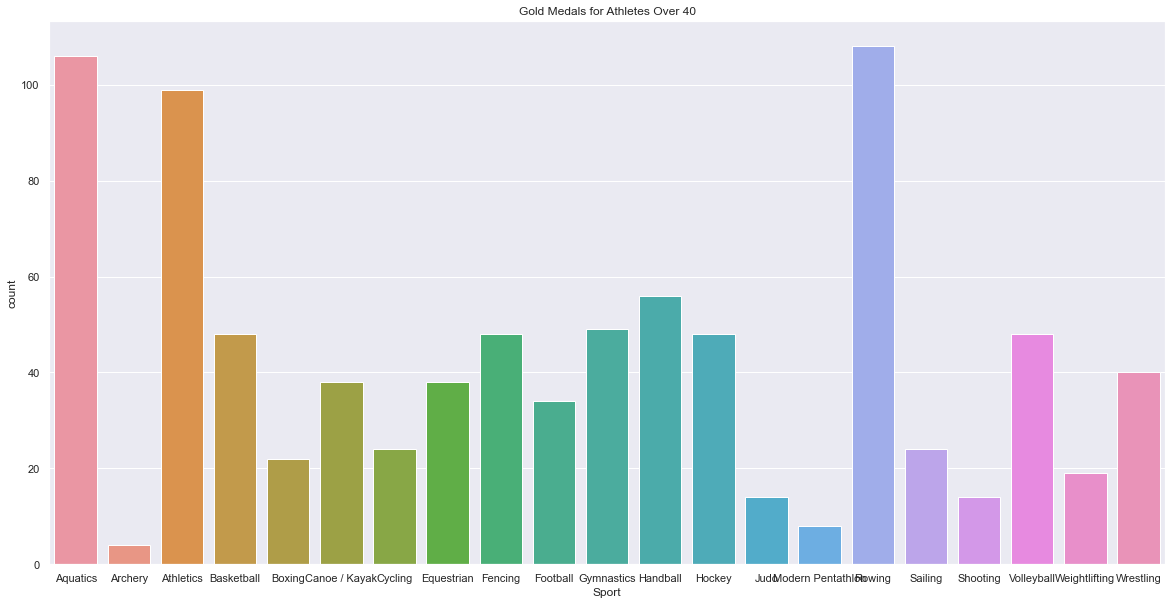

In [196]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDisciplines)
plt.title('Gold Medals for Athletes Over 40')
plt.show()

In [197]:
countMedal = df['Medal'].value_counts()
countMedal

Bronze    5258
Gold      5042
Silver    5016
Name: Medal, dtype: int64

## What is the distribution of sports with respect to year for male and female?

We can see that the participation of females started late in these sports - Cycling, Football, Hockey, Judo, Modern Pentathlon, Sailing, Weightlifting, & Wrestling.

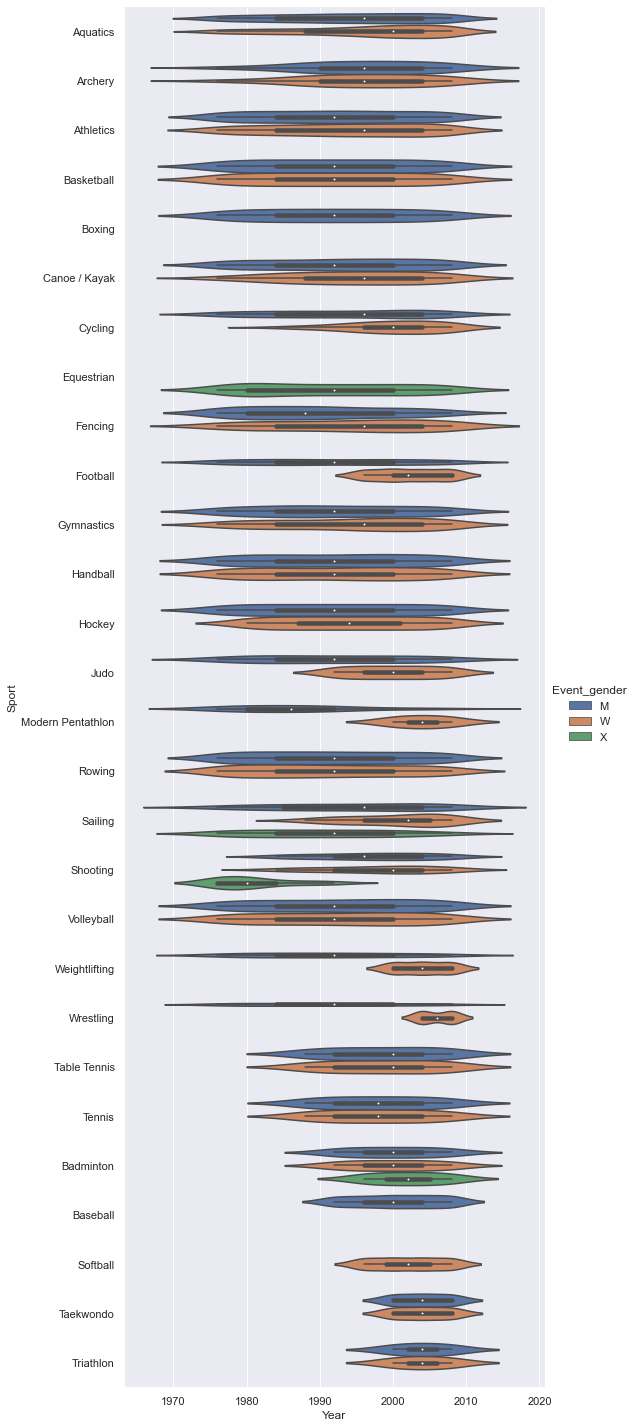

In [198]:
sns.catplot(
    data=goldMedals, x="Year", y="Sport", hue="Event_gender", kind="violin", height=20, aspect=0.4
)

In [199]:
frames = df

Medals = pd.get_dummies(df.Medal, columns=['Gold', 'Silver', 'Bronze'])
Medals

,Bronze,Gold,Silver
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
15311,1,0,0
15312,0,1,0
15313,0,0,1
15314,0,1,0


# Analyzing the top 5 countries that won the medal


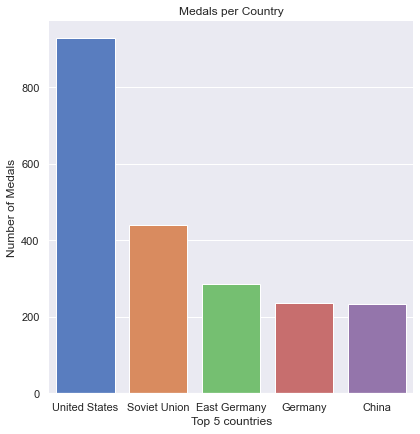

In [212]:
#print(goldMedals.Country.value_counts().reset_index(name='Medal').head())
totalGoldMedals = goldMedals.Country.value_counts().reset_index(name='Medal').head(5)

g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted", ax = )
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')
plt.show()

In [254]:
# print(df.Sport.value_counts().reset_index(name='Medal'))
tmp = df.groupby(['Country'])['Medal'].value_counts().reset_index(name = 'Medal Count')
tmp

,Country,Medal,Medal Count
0,Afghanistan,Bronze,1
1,Algeria,Bronze,8
2,Algeria,Gold,4
3,Algeria,Silver,2
4,Argentina,Bronze,70
...,...,...,...
296,Zambia,Bronze,1
297,Zambia,Silver,1
298,Zimbabwe,Gold,18
299,Zimbabwe,Silver,4


# Distribution of Medals per country

We can see that United States has exceptionally high amounts of medals.
East Germany has the second highest number of medals.

In [256]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
trace = go.Scatter(
    x = tmp['Medal Count'],
    y = tmp['Country'],
    name="Medals per Country",
    marker=dict(
        color="Blue",
    ),
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Medals per Country',
          xaxis = dict(title = 'Medal Count', showticklabels=True), 
          yaxis = dict(title = 'Country'),
          hovermode = 'closest',
          width = 1000,
          height = 1000
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='Medals-country')

# What is the distribution of event genders?

Number of men participating are higher than women. There are also some common events.

<AxesSubplot:xlabel='Event_gender', ylabel='count'>

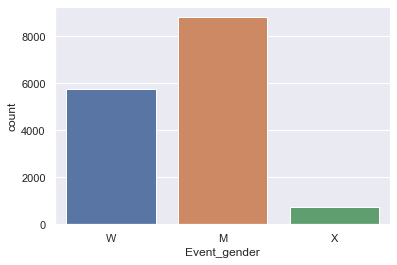

In [248]:
sns.countplot(x=df["Event_gender"])